In [1]:
!pip install hazm

In [2]:
!pip show hazm

Name: hazm
Version: 0.9.1
Summary: Persian NLP Toolkit
Home-page: https://roshan-ai.ir/hazm/
Author: Roshan
Author-email: salam@roshan-ai.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: gensim, nltk, numpy, python-crfsuite, scikit-learn
Required-by: 


In [4]:
from hazm import sent_tokenize
import regex as re
from hazm import Normalizer
from hazm import word_tokenize
import pandas as pd
from tqdm import tqdm
import numpy as np

In [5]:
data = pd.read_csv('normalized_raw_data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1428 non-null   int64  
 1   cat1         1428 non-null   object 
 2   cat2         1428 non-null   object 
 3   cat3         1428 non-null   object 
 4   title        1428 non-null   object 
 5   description  1428 non-null   object 
 6   url          1428 non-null   object 
 7   sub_title    1428 non-null   object 
 8   price        1428 non-null   int64  
 9   size         1428 non-null   int64  
 10  year         1428 non-null   int64  
 11  room_number  1428 non-null   int64  
 12  color        1428 non-null   object 
 13  mileage      1428 non-null   int64  
 14  CPU          1428 non-null   object 
 15  RAM          1428 non-null   float64
dtypes: float64(1), int64(6), object(9)
memory usage: 178.6+ KB


,id,cat1,cat2,cat3,title,description,url,sub_title,price,size,year,room_number,color,mileage,CPU,RAM
0,1,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک hp,با درود لپ تاپ‌های استوک مارک hp hp probook ۶۵...,https://divar.ir/v/لپ-تاپ-استوک-hp_رایانه-همرا...,۲ ساعت پیش در شیراز، ملاصدرا,14900000,-1,-1,-1,خاکستری,-1,Core i7,8.0
1,2,electronic-devices,computers,laptop-notebook-macbook,لپتاپ HP PRO نسل ۹ مهندسی,لپ تاپ، مهندسی، گرافیکی، پر سرعت شیک و ظریف بر...,https://divar.ir/v/لپتاپ-hp-pro-نسل-۹-مهندسی_ر...,۲ ساعت پیش در شیراز، وصال,18800000,-1,-1,-1,نقره‌ای,-1,Ryzen 5,8.0
2,3,electronic-devices,computers,laptop-notebook-macbook,فروش لپتاپ استوک اروپایی,سلام تکنو رایان واردکننده لپتاپ استوک اروپایی ...,https://divar.ir/v/فروش-لپتاپ-استوک-اروپایی_را...,۳ ساعت پیش در شیراز، زند,3900000,-1,-1,-1,Unknown,-1,Unknown,4.0
3,4,electronic-devices,computers,laptop-notebook-macbook,HP ZBOOK۱۵ g۳ با گرافیک مجزا مناسب طراحی,بدون واسطه به قیمت عمده خرید کنید فروشگاه لپت...,https://divar.ir/v/hp-zbook15-g3-با-گرافیک-مجز...,۳ ساعت پیش در شیراز، ملاصدرا,17900000,-1,-1,-1,مشکی,-1,Core i7,8.0
4,5,electronic-devices,computers,laptop-notebook-macbook,لپ تاپ استوک واردات مستقیم از دبی,با سلام و احترام خدمت شما کاربر گرامی. کمال ت...,https://divar.ir/v/لپ-تاپ-استوک-واردات-مستقیم-...,۳ ساعت پیش در شیراز، پودنک,10000000,-1,-1,-1,سایر,-1,غیره,-1.0


In [6]:
data.cat1.value_counts()

real-estate           575
home-kitchen          286
electronic-devices    284
vehicles              283
Name: cat1, dtype: int64

In [7]:
data = data[['description', 'cat1']]
data.head()

,description,cat1
0,با درود لپ تاپ‌های استوک مارک hp hp probook ۶۵...,electronic-devices
1,لپ تاپ، مهندسی، گرافیکی، پر سرعت شیک و ظریف بر...,electronic-devices
2,سلام تکنو رایان واردکننده لپتاپ استوک اروپایی ...,electronic-devices
3,بدون واسطه به قیمت عمده خرید کنید فروشگاه لپت...,electronic-devices
4,با سلام و احترام خدمت شما کاربر گرامی. کمال ت...,electronic-devices


In [8]:
def preprocess(description):
    # Text preprocessing
    # Remove extra denotations like :
    normalized_description = re.sub('[:,،..<>/!@#$%~{}();»«…“”"؛؟◊♦–\*\+_\^\=]', ' ', description)
    return(normalized_description)

In [9]:
for i in tqdm(range(data.shape[0])):
    data.loc[i, 'normalized_description'] = preprocess(data['description'].iloc[i])

100%|██████████| 1428/1428 [00:00<00:00, 2635.87it/s]


In [10]:
data

,description,cat1,normalized_description
0,با درود لپ تاپ‌های استوک مارک hp hp probook ۶۵...,electronic-devices,با درود لپ تاپ‌های استوک مارک hp hp probook ۶۵...
1,لپ تاپ، مهندسی، گرافیکی، پر سرعت شیک و ظریف بر...,electronic-devices,لپ تاپ مهندسی گرافیکی پر سرعت شیک و ظریف بر...
2,سلام تکنو رایان واردکننده لپتاپ استوک اروپایی ...,electronic-devices,سلام تکنو رایان واردکننده لپتاپ استوک اروپایی ...
3,بدون واسطه به قیمت عمده خرید کنید فروشگاه لپت...,electronic-devices,بدون واسطه به قیمت عمده خرید کنید فروشگاه لپت...
4,با سلام و احترام خدمت شما کاربر گرامی. کمال ت...,electronic-devices,با سلام و احترام خدمت شما کاربر گرامی کمال ت...
...,...,...,...
1423,سلام و درود خدمت همه عزیزان نقد و اقساط حداقل ...,vehicles,سلام و درود خدمت همه عزیزان نقد و اقساط حداقل ...
1424,خودرو در حد صفر میباشد اتوماتیک دارای گیربکس ژ...,vehicles,خودرو در حد صفر میباشد اتوماتیک دارای گیربکس ژ...
1425,ام وی ام ایکس۳۳ATنیوفیس بسیار تمیز و بدون خط و...,vehicles,ام وی ام ایکس۳۳ATنیوفیس بسیار تمیز و بدون خط و...
1426,فوق العاده سالم و بی رنگ یک جفت باند پایونیر چ...,vehicles,فوق العاده سالم و بی رنگ یک جفت باند پایونیر چ...


In [11]:
from sklearn.model_selection import train_test_split

X = data['normalized_description']
y = data['cat1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

print("X_train shape:", X_train.shape)
print("y_train shape:", X_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1285,)
y_train shape: (1285,)
X_test shape: (143,)
y_test shape: (143,)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase = False, tokenizer = word_tokenize)

tfidf.fit(X_train)
X_train_tf_idf = tfidf.transform(X_train)
X_test_tf_idf = tfidf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train : 90%    Test : 10% <br>
Evaluation : using 10_fold_cv <br>
8209 features without hazm.Normalizer <br>
8296 features with hazm.Normalizer <br>

In [13]:
X_train_tf_idf = X_train_tf_idf.todense()
X_test_tf_idf = X_test_tf_idf.todense()

X_train_tf_idf = np.asarray(X_train_tf_idf)
X_test_tf_idf = np.asarray(X_test_tf_idf)


print("X_train_tf_idf shape :", X_train_tf_idf.shape)
print("X_test_tf_idf shape :", X_test_tf_idf.shape)

X_train_tf_idf shape : (1285, 8209)
X_test_tf_idf shape : (143, 8209)


# 🔴 Don't use scaler for NB
# When i used scaling(like normalization) the accuracy of Naive bayes drops terribly !!!

In [14]:
X_train_tf_idf.max(), X_train_tf_idf.min()

(0.997038997176662, 0.0)

In [15]:
X_test_tf_idf.max(), X_test_tf_idf.min()

(0.7678593708425904, 0.0)

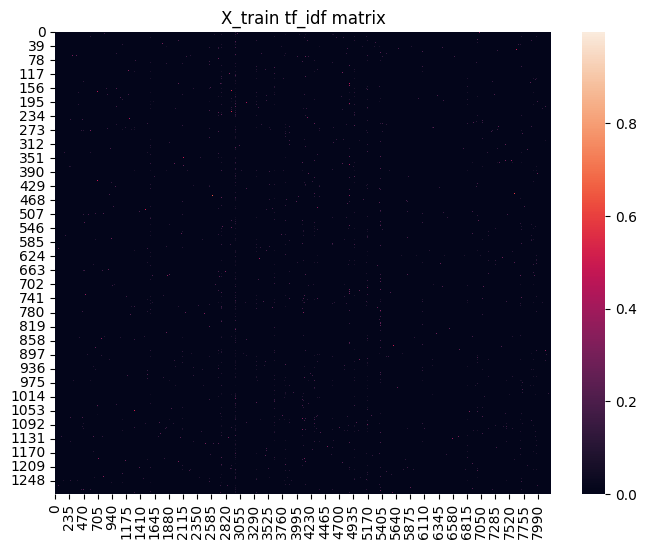

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.title('X_train tf_idf matrix')
sns.heatmap(X_train_tf_idf)
plt.show()

# It's too much sparse, let's use SVD

# Metrics calculation function

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
def metrics_report(estimator, X_train, y_train, X_test, y_test, plot = True, ret = False):
  '''
  if you put ret to True it will return the following tupple:
    (accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1_train, f1_test)
  '''
  pred_train = estimator.predict(X_train)
  pred_test = estimator.predict(X_test)

  accuracy_train = accuracy_score(y_train, pred_train)
  accuracy_test = accuracy_score(y_test, pred_test)

  precision_train = precision_score(y_train, pred_train, average = 'macro')
  precision_test = precision_score(y_test, pred_test, average = 'macro')

  recall_train = recall_score(y_train, pred_train, average = 'macro')
  recall_test = recall_score(y_test, pred_test, average = 'macro')

  f1_train = f1_score(y_train, pred_train, average = 'macro')
  f1_test = f1_score(y_test, pred_test, average = 'macro')

  if ret:
    return (accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test,
            f1_train, f1_test)

  else :
    print("accuracy on train = {:.3f}%".format(accuracy_train*100))
    print("accuracy on test = {:.3f}%".format(accuracy_test*100))

    print("\n")

    print("precision(macro) on train = {:.4f}".format(precision_train))
    print("precision(macro) on test = {:.4f}".format(precision_test))

    print("\n")

    print("recall(macro) on train = {:.4f}".format(recall_train))
    print("recall(macro) on test = {:.4f}".format(recall_test))

    print("\n")

    print("f1(macro) on train = {:.4f}".format(f1_train))
    print("f1(macro) on test = {:.4f}".format(f1_test))

    print("\n")

  if plot:
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_test),
                      display_labels = np.unique(y_test))
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(ax=ax, cmap = 'rocket')
    plt.show()

# Pipeline

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

scaler = StandardScaler()
svd = TruncatedSVD(random_state = 1)
naive_bayes = GaussianNB()
log_reg = LogisticRegression(random_state = 1, max_iter = 500, penalty = 'l2')
svm = SVC(random_state = 1)

pipe_naive_bayes = Pipeline(steps=[("svd", svd) , ("naive_bayes", naive_bayes)])
pipe_log_reg = Pipeline(steps=[("scaler", scaler), ("svd", svd) , ("log_reg", log_reg)])
pipe_svm = Pipeline(steps=[("scaler", scaler), ("svd", svd) , ("svm", svm)])

In [19]:
y_train.value_counts() / y_train.value_counts().sum()

real-estate           0.407004
electronic-devices    0.199222
home-kitchen          0.196887
vehicles              0.196887
Name: cat1, dtype: float64

In [31]:
params_naive_bayes = {
    "svd__n_components": [100, 250 ,500],
}

params_log_reg = {
    "svd__n_components": [100, 250 ,500],
    "log_reg__C": [0.1, 1, 10],
    "log_reg__class_weight": [None, 'balanced']
}

params_svm = {
    "svd__n_components": [100, 250 ,500],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10],
    'svm__kernel': ['linear', 'poly'], # rbf is not good for this
    "svm__class_weight": [None, 'balanced']
}

In [21]:
grid_search_naive_bayes = GridSearchCV(pipe_naive_bayes, params_naive_bayes, cv=5, verbose = 5)
grid_search_naive_bayes.fit(X_train_tf_idf, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............svd__n_components=100;, score=0.918 total time=   3.4s
[CV 2/5] END .............svd__n_components=100;, score=0.899 total time=   3.1s
[CV 3/5] END .............svd__n_components=100;, score=0.856 total time=   2.8s
[CV 4/5] END .............svd__n_components=100;, score=0.930 total time=   3.2s
[CV 5/5] END .............svd__n_components=100;, score=0.938 total time=   2.2s
[CV 1/5] END .............svd__n_components=250;, score=0.626 total time=   4.0s
[CV 2/5] END .............svd__n_components=250;, score=0.732 total time=   4.3s
[CV 3/5] END .............svd__n_components=250;, score=0.634 total time=   8.1s
[CV 4/5] END .............svd__n_components=250;, score=0.545 total time=   7.9s
[CV 5/5] END .............svd__n_components=250;, score=0.860 total time=   6.1s
[CV 1/5] END .............svd__n_components=500;, score=0.381 total time=   8.2s
[CV 2/5] END .............svd__n_components=500;,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('svd', TruncatedSVD(random_state=1)),
                                       ('naive_bayes', GaussianNB())]),
             param_grid={'svd__n_components': [100, 250, 500]}, verbose=5)

In [22]:
grid_search_naive_bayes.best_score_, grid_search_naive_bayes.best_params_

(0.9081712062256809, {'svd__n_components': 100})

In [23]:
tuned_naive_bayes = Pipeline(steps=[("svd", TruncatedSVD(random_state = 1, n_components = 100)) ,
                ("naive_bayes", GaussianNB())])
tuned_naive_bayes.fit(X_train_tf_idf, y_train)

Pipeline(steps=[('svd', TruncatedSVD(n_components=100, random_state=1)),
                ('naive_bayes', GaussianNB())])

accuracy on train = 92.685%
accuracy on test = 92.308%


precision(macro) on train = 0.9126
precision(macro) on test = 0.9137


recall(macro) on train = 0.9182
recall(macro) on test = 0.9188


f1(macro) on train = 0.9146
f1(macro) on test = 0.9146




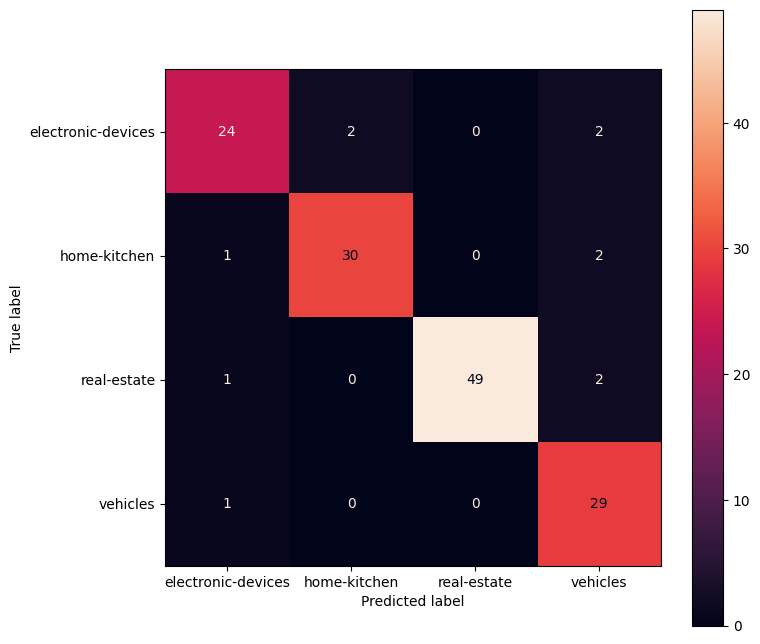

In [25]:
metrics_report(tuned_naive_bayes, X_train_tf_idf, y_train, X_test_tf_idf, y_test, plot = True, ret = False)

In [26]:
grid_search_log_reg = GridSearchCV(pipe_log_reg, params_log_reg, cv=5, verbose = 5)
grid_search_log_reg.fit(X_train_tf_idf, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=100;, score=0.891 total time=   2.8s
[CV 2/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=100;, score=0.930 total time=   3.5s
[CV 3/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=100;, score=0.899 total time=   2.4s
[CV 4/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=100;, score=0.911 total time=   2.4s
[CV 5/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=100;, score=0.895 total time=   2.5s
[CV 1/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=250;, score=0.926 total time=   7.5s
[CV 2/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=250;, score=0.949 total time=   6.6s
[CV 3/5] END log_reg__C=0.1, log_reg__class_weight=None, svd__n_components=250;, score=0.934 total time=   9.4s
[CV 4/5] END log_reg__C=0.1, log_reg__class

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=100;, score=0.891 total time=   2.8s
[CV 3/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=100;, score=0.895 total time=   3.5s
[CV 4/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=100;, score=0.879 total time=   3.7s
[CV 5/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=100;, score=0.879 total time=   3.8s
[CV 1/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=250;, score=0.891 total time=   4.4s
[CV 2/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=250;, score=0.946 total time=   4.5s
[CV 3/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=250;, score=0.922 total time=   6.6s
[CV 4/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=250;, score=0.922 total time=   4.4s
[CV 5/5] END log_reg__C=10, log_reg__class_weight=balanced, svd__n_components=25

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svd', TruncatedSVD(random_state=1)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=500,
                                                           random_state=1))]),
             param_grid={'log_reg__C': [0.1, 1, 10],
                         'log_reg__class_weight': [None, 'balanced'],
                         'svd__n_components': [100, 250, 500]},
             verbose=5)

In [27]:
grid_search_log_reg.best_score_, grid_search_log_reg.best_params_

(0.9548638132295719,
 {'log_reg__C': 0.1, 'log_reg__class_weight': None, 'svd__n_components': 500})

In [28]:
tuned_log_reg = Pipeline(steps=[("scaler", StandardScaler()), ("svd", TruncatedSVD(random_state = 1, n_components = 500)) ,
                                ("log_reg", LogisticRegression(random_state = 1, max_iter = 500, penalty = 'l2',
                                                               C = 0.1, class_weight = None))])
tuned_log_reg.fit(X_train_tf_idf, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=500, random_state=1)),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=500, random_state=1))])

accuracy on train = 99.533%
accuracy on test = 91.608%


precision(macro) on train = 0.9946
precision(macro) on test = 0.9129


recall(macro) on train = 0.9941
recall(macro) on test = 0.9133


f1(macro) on train = 0.9943
f1(macro) on test = 0.9075




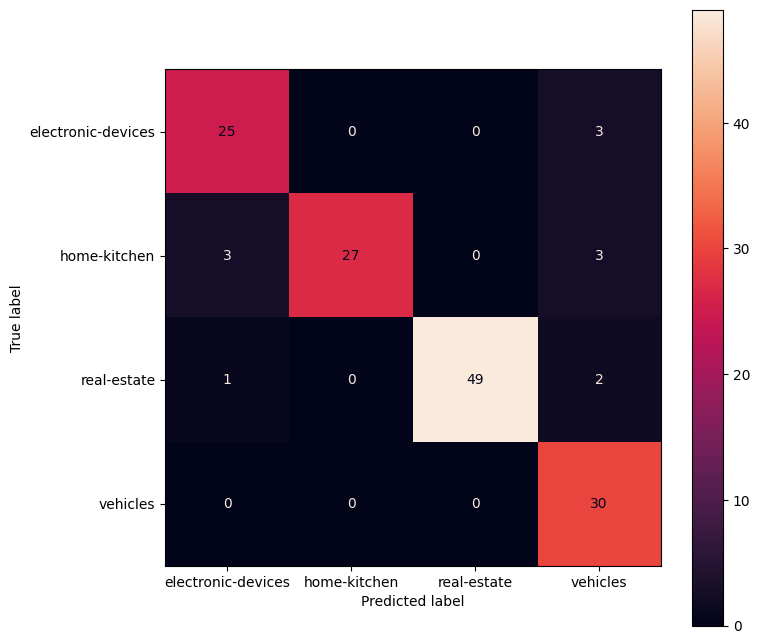

In [29]:
metrics_report(tuned_log_reg, X_train_tf_idf, y_train, X_test_tf_idf, y_test, plot = True, ret = False)

In [33]:
grid_search_svm = GridSearchCV(pipe_svm, params_svm, cv=5, verbose = 5)
grid_search_svm.fit(X_train_tf_idf, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END svd__n_components=100, svm__C=0.1, svm__class_weight=None, svm__gamma=0.1, svm__kernel=linear;, score=0.872 total time=   3.5s
[CV 2/5] END svd__n_components=100, svm__C=0.1, svm__class_weight=None, svm__gamma=0.1, svm__kernel=linear;, score=0.907 total time=   3.7s
[CV 3/5] END svd__n_components=100, svm__C=0.1, svm__class_weight=None, svm__gamma=0.1, svm__kernel=linear;, score=0.899 total time=   3.0s
[CV 4/5] END svd__n_components=100, svm__C=0.1, svm__class_weight=None, svm__gamma=0.1, svm__kernel=linear;, score=0.895 total time=   3.0s
[CV 5/5] END svd__n_components=100, svm__C=0.1, svm__class_weight=None, svm__gamma=0.1, svm__kernel=linear;, score=0.875 total time=   2.8s
[CV 1/5] END svd__n_components=100, svm__C=0.1, svm__class_weight=None, svm__gamma=0.1, svm__kernel=poly;, score=0.852 total time=   3.6s
[CV 2/5] END svd__n_components=100, svm__C=0.1, svm__class_weight=None, svm__gamma=0.1, svm__kernel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svd', TruncatedSVD(random_state=1)),
                                       ('svm', SVC(random_state=1))]),
             param_grid={'svd__n_components': [100, 250, 500],
                         'svm__C': [0.1, 1, 10],
                         'svm__class_weight': [None, 'balanced'],
                         'svm__gamma': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'poly']},
             verbose=5)

In [34]:
grid_search_svm.best_score_, grid_search_svm.best_params_

(0.9299610894941635,
 {'svd__n_components': 500,
  'svm__C': 0.1,
  'svm__class_weight': 'balanced',
  'svm__gamma': 0.1,
  'svm__kernel': 'linear'})

In [43]:
tuned_svm = Pipeline(steps=[("scaler", StandardScaler()), ("svd", TruncatedSVD(random_state = 1, n_components = 500)) ,
                                ("svm", SVC(random_state = 1, C = 0.1, class_weight = 'balanced', gamma = 0.1,
                                            kernel = 'linear'))])
tuned_svm.fit(X_train_tf_idf, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=500, random_state=1)),
                ('svm',
                 SVC(C=0.1, class_weight='balanced', gamma=0.1, kernel='linear',
                     random_state=1))])

accuracy on train = 99.844%
accuracy on test = 90.210%


precision(macro) on train = 0.9980
precision(macro) on test = 0.8941


recall(macro) on train = 0.9980
recall(macro) on test = 0.8968


f1(macro) on train = 0.9980
f1(macro) on test = 0.8910




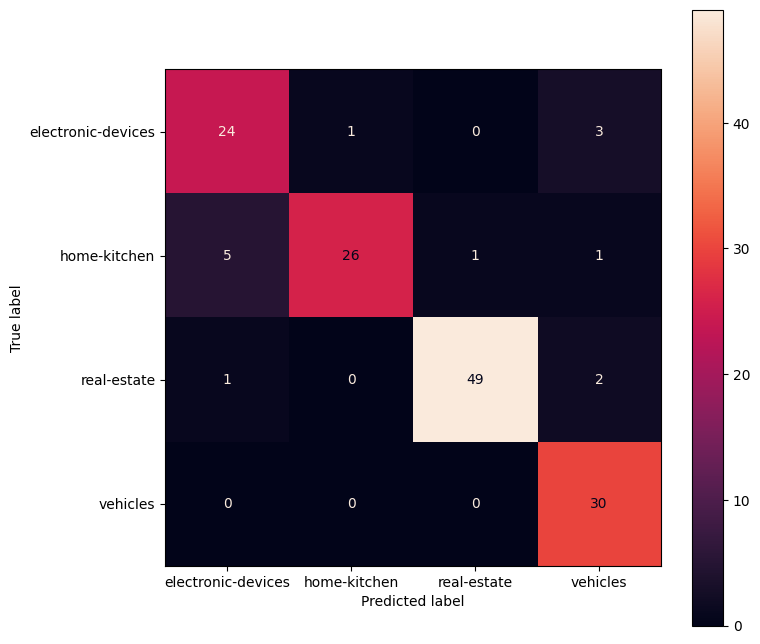

In [44]:
metrics_report(tuned_svm, X_train_tf_idf, y_train, X_test_tf_idf, y_test, plot = True, ret = False)